In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.0/883.0 kB 6.7 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO('yolov8x.pt')

100%|██████████| 131M/131M [00:01<00:00, 84.0MB/s]


In [ ]:
results = model.predict('input_videos/video1.mp4',save = True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/519) /content/input_videos/video1.mp4: 384x640 20 persons, 63.1ms
video 1/1 (frame 2/519) /content/input_videos/video1.mp4: 384x640 20 persons, 63.1ms
video 1/1 (frame 3/519) /content/input_videos/video1.mp4: 384x640 18 persons, 58.7ms
video 1/1 (frame 4/519) /content/input_videos/video1.mp4: 384x640 18 persons, 1 tennis racket, 51.0ms
video 1/1 (frame 5/519) /content/input_videos/video1.mp4: 384x640 20 persons, 48.5ms
video 1/1 (fra

In [ ]:
results[10]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

# Creating dataset


In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="jae0vP7uLaxtuB8FqIwx")
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.3.3, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to football-players-detection-1 in yolov8:: 100%|██████████| 1338/1338 [00:00<00:00, 2483.38it/s]


In [ ]:
dataset.location

'/content/football-players-detection-1'

In [ ]:
import shutil

shutil.move('football-players-detection-1/train',
            'football-players-detection-1/football-players-detection-1/train'
            )

shutil.move('football-players-detection-1/test',
            'football-players-detection-1/football-players-detection-1/test'
            )

shutil.move('football-players-detection-1/valid',
            'football-players-detection-1/football-players-detection-1/valid')

'football-players-detection-1/football-players-detection-1/valid'

# Training


In [ ]:
!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml epochs=50 imgsz=640

Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/football-players-detection-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test models


In [ ]:
model = YOLO('best.pt')

In [ ]:
results = model.predict('input_videos/video1.mp4',save = True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/519) /content/input_videos/video1.mp4: 384x640 17 players, 95.1ms
video 1/1 (frame 2/519) /content/input_videos/video1.mp4: 384x640 20 players, 1 referee, 58.4ms
video 1/1 (frame 3/519) /content/input_videos/video1.mp4: 384x640 19 players, 1 referee, 58.3ms
video 1/1 (frame 4/519) /content/input_videos/video1.mp4: 384x640 20 players, 57.7ms
video 1/1 (frame 5/519) /content/input_videos/video1.mp4: 384x640 20 players, 57.2ms
video 1/1

# utils

In [ ]:
import cv2

In [ ]:
def read_video(video_path):
  cap = cv2.VideoCapture(video_path)
  frames = []
  while True:
      ret, frame = cap.read()
      if not ret:
          break
      frames.append(frame)
  return frames


In [ ]:
def save_video(ouput_video_frames,output_video_path):
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_video_path, fourcc, 24, (ouput_video_frames[0].shape[1], ouput_video_frames[0].shape[0]))
    for frame in ouput_video_frames:
        out.write(frame)
    out.release()

In [ ]:
video_frames = read_video('video1.mp4')

In [ ]:
video_frames[0].shape

(1080, 1920, 3)

In [ ]:
def get_center_of_bbox(bbox):
    x1,y1,x2,y2 = bbox
    return int((x1+x2)/2),int((y1+y2)/2)

def get_bbox_width(bbox):
    return bbox[2]-bbox[0]

def measure_distance(p1,p2):
    return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5

def measure_xy_distance(p1,p2):
    return p1[0]-p2[0],p1[1]-p2[1]

def get_foot_position(bbox):
    x1,y1,x2,y2 = bbox
    return int((x1+x2)/2),int(y2)

In [ ]:
class PlayerBallAssigner():
    def __init__(self):
        self.max_player_ball_distance = 70

    def assign_ball_to_player(self,players,ball_bbox):
        ball_position = get_center_of_bbox(ball_bbox)

        miniumum_distance = 99999
        assigned_player=-1

        for player_id, player in players.items():
            player_bbox = player['bbox']

            distance_left = measure_distance((player_bbox[0],player_bbox[-1]),ball_position)
            distance_right = measure_distance((player_bbox[2],player_bbox[-1]),ball_position)
            distance = min(distance_left,distance_right)

            if distance < self.max_player_ball_distance:
                if distance < miniumum_distance:
                    miniumum_distance = distance
                    assigned_player = player_id

        return assigned_player

# trackers

In [ ]:
!pip install supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 3.4 MB/s eta 0:00:00


In [ ]:
import supervision as sv
import pickle
import os
import numpy as np
import pandas as pd

In [ ]:
class Tracker:
    def __init__(self, model_path):
        self.model = YOLO(model_path)
        self.tracker = sv.ByteTrack()

    def add_position_to_tracks(sekf,tracks):
        for object, object_tracks in tracks.items():
            for frame_num, track in enumerate(object_tracks):
                for track_id, track_info in track.items():
                    bbox = track_info['bbox']
                    if object == 'ball':
                        position= get_center_of_bbox(bbox)
                    else:
                        position = get_foot_position(bbox)
                    tracks[object][frame_num][track_id]['position'] = position

    def interpolate_ball_positions(self,ball_positions):
        ball_positions = [x.get(1,{}).get('bbox',[]) for x in ball_positions]
        df_ball_positions = pd.DataFrame(ball_positions,columns=['x1','y1','x2','y2'])

        # Interpolate missing values
        df_ball_positions = df_ball_positions.interpolate()
        df_ball_positions = df_ball_positions.bfill()

        ball_positions = [{1: {"bbox":x}} for x in df_ball_positions.to_numpy().tolist()]

        return ball_positions

    def detect_frames(self, frames):
        batch_size=20
        detections = []
        for i in range(0,len(frames),batch_size):
            detections_batch = self.model.predict(frames[i:i+batch_size],conf=0.1)
            detections += detections_batch
        return detections

    def get_object_tracks(self, frames, read_from_stub=False, stub_path=None):

        if read_from_stub and stub_path is not None and os.path.exists(stub_path):
            with open(stub_path,'rb') as f:
                tracks = pickle.load(f)
            return tracks

        detections = self.detect_frames(frames)

        tracks={
            "players":[],
            "referees":[],
            "ball":[]
        }

        for frame_num, detection in enumerate(detections):
            cls_names = detection.names
            cls_names_inv = {v:k for k,v in cls_names.items()}

            # Covert to supervision Detection format
            detection_supervision = sv.Detections.from_ultralytics(detection)

            # Convert GoalKeeper to player object
            for object_ind , class_id in enumerate(detection_supervision.class_id):
                if cls_names[class_id] == "goalkeeper":
                    detection_supervision.class_id[object_ind] = cls_names_inv["player"]

            # Track Objects
            detection_with_tracks = self.tracker.update_with_detections(detection_supervision)

            tracks["players"].append({})
            tracks["referees"].append({})
            tracks["ball"].append({})

            for frame_detection in detection_with_tracks:
                bbox = frame_detection[0].tolist()
                cls_id = frame_detection[3]
                track_id = frame_detection[4]

                if cls_id == cls_names_inv['player']:
                    tracks["players"][frame_num][track_id] = {"bbox":bbox}

                if cls_id == cls_names_inv['referee']:
                    tracks["referees"][frame_num][track_id] = {"bbox":bbox}

            for frame_detection in detection_supervision:
                bbox = frame_detection[0].tolist()
                cls_id = frame_detection[3]

                if cls_id == cls_names_inv['ball']:
                    tracks["ball"][frame_num][1] = {"bbox":bbox}

        if stub_path is not None:
            with open(stub_path,'wb') as f:
                pickle.dump(tracks,f)

        return tracks

    def draw_ellipse(self,frame,bbox,color,track_id=None):
        y2 = int(bbox[3])
        x_center, _ = get_center_of_bbox(bbox)
        width = get_bbox_width(bbox)

        cv2.ellipse(
            frame,
            center=(x_center,y2),
            axes=(int(width), int(0.35*width)),
            angle=0.0,
            startAngle=-45,
            endAngle=235,
            color = color,
            thickness=2,
            lineType=cv2.LINE_4
        )

        rectangle_width = 40
        rectangle_height=20
        x1_rect = x_center - rectangle_width//2
        x2_rect = x_center + rectangle_width//2
        y1_rect = (y2- rectangle_height//2) +15
        y2_rect = (y2+ rectangle_height//2) +15

        if track_id is not None:
            cv2.rectangle(frame,
                          (int(x1_rect),int(y1_rect) ),
                          (int(x2_rect),int(y2_rect)),
                          color,
                          cv2.FILLED)

            x1_text = x1_rect+12
            if track_id > 99:
                x1_text -=10

            cv2.putText(
                frame,
                f"{track_id}",
                (int(x1_text),int(y1_rect+15)),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.6,
                (0,0,0),
                2
            )

        return frame

    def draw_traingle(self,frame,bbox,color):
        y= int(bbox[1])
        x,_ = get_center_of_bbox(bbox)

        triangle_points = np.array([
            [x,y],
            [x-10,y-20],
            [x+10,y-20],
        ])
        cv2.drawContours(frame, [triangle_points],0,color, cv2.FILLED)
        cv2.drawContours(frame, [triangle_points],0,(0,0,0), 2)

        return frame

    def draw_team_ball_control(self,frame,frame_num,team_ball_control):
        # Draw a semi-transparent rectaggle
        overlay = frame.copy()
        cv2.rectangle(overlay, (1350, 850), (1900,970), (255,255,255), -1 )
        alpha = 0.4
        cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0, frame)

        team_ball_control_till_frame = team_ball_control[:frame_num+1]
        # Get the number of time each team had ball control
        team_1_num_frames = team_ball_control_till_frame[team_ball_control_till_frame==1].shape[0]
        team_2_num_frames = team_ball_control_till_frame[team_ball_control_till_frame==2].shape[0]
        team_1 = team_1_num_frames/(team_1_num_frames+team_2_num_frames)
        team_2 = team_2_num_frames/(team_1_num_frames+team_2_num_frames)

        cv2.putText(frame, f"Team 1 Ball Control: {team_1*100:.2f}%",(1400,900), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 3)
        cv2.putText(frame, f"Team 2 Ball Control: {team_2*100:.2f}%",(1400,950), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 3)

        return frame

    def draw_annotations(self,video_frames, tracks,team_ball_control):
        output_video_frames= []
        for frame_num, frame in enumerate(video_frames):
            frame = frame.copy()

            player_dict = tracks["players"][frame_num]
            ball_dict = tracks["ball"][frame_num]
            referee_dict = tracks["referees"][frame_num]

            # Draw Players
            for track_id, player in player_dict.items():
                color = player.get("team_color",(0,0,255))
                frame = self.draw_ellipse(frame, player["bbox"],color, track_id)

                if player.get('has_ball',False):
                    frame = self.draw_traingle(frame, player["bbox"],(0,0,255))

            # Draw Referee
            for _, referee in referee_dict.items():
                frame = self.draw_ellipse(frame, referee["bbox"],(0,255,255))

            # Draw ball
            for track_id, ball in ball_dict.items():
                frame = self.draw_traingle(frame, ball["bbox"],(0,255,0))


            # Draw Team Ball Control
            frame = self.draw_team_ball_control(frame, frame_num, team_ball_control)

            output_video_frames.append(frame)

        return output_video_frames

In [ ]:
tracker = Tracker('best.pt')

In [ ]:
tracks = tracker.get_object_tracks(video_frames,read_from_stub=True,stub_path='tracks.pkl')


0: 384x640 20 players, 36.3ms
1: 384x640 21 players, 1 referee, 36.3ms
2: 384x640 21 players, 1 referee, 36.3ms
3: 384x640 21 players, 1 referee, 36.3ms
4: 384x640 21 players, 36.3ms
5: 384x640 21 players, 1 referee, 36.3ms
6: 384x640 24 players, 1 referee, 36.3ms
7: 384x640 23 players, 2 referees, 36.3ms
8: 384x640 23 players, 3 referees, 36.3ms
9: 384x640 22 players, 3 referees, 36.3ms
10: 384x640 23 players, 1 referee, 36.3ms
11: 384x640 22 players, 1 referee, 36.3ms
12: 384x640 21 players, 2 referees, 36.3ms
13: 384x640 22 players, 2 referees, 36.3ms
14: 384x640 21 players, 3 referees, 36.3ms
15: 384x640 24 players, 2 referees, 36.3ms
16: 384x640 22 players, 2 referees, 36.3ms
17: 384x640 22 players, 2 referees, 36.3ms
18: 384x640 22 players, 1 referee, 36.3ms
19: 384x640 23 players, 1 referee, 36.3ms
Speed: 3.1ms preprocess, 36.3ms inference, 38.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 32.6ms
1: 384x640 20 players, 2 referees, 32.6ms


In [70]:
tracker.add_position_to_tracks(tracks)

In [71]:
# camera movement estimator
camera_movement_estimator = CameraMovementEstimator(video_frames[0])
camera_movement_per_frame = camera_movement_estimator.get_camera_movement(video_frames,
                                                                            read_from_stub=True,
                                                                            stub_path='camera_movement_stub.pkl')
camera_movement_estimator.add_adjust_positions_to_tracks(tracks,camera_movement_per_frame)

In [72]:
# View Trasnformer
view_transformer = ViewTransformer()
view_transformer.add_transformed_position_to_tracks(tracks)

In [ ]:
tracks["ball"] = tracker.interpolate_ball_positions(tracks["ball"])

In [ ]:
tracks

{'players': [{1: {'bbox': [218.13845825195312,
     451.2644348144531,
     260.0894470214844,
     552.8460693359375]},
   2: {'bbox': [383.18658447265625,
     557.7723388671875,
     439.00750732421875,
     666.0673217773438]},
   3: {'bbox': [1480.362548828125,
     614.0407104492188,
     1529.32373046875,
     749.3889770507812]},
   4: {'bbox': [140.02017211914062,
     282.236083984375,
     171.215576171875,
     360.95379638671875]},
   5: {'bbox': [439.11749267578125,
     339.58135986328125,
     469.52618408203125,
     422.41845703125]},
   6: {'bbox': [1280.3955078125,
     354.74139404296875,
     1317.4140625,
     442.07720947265625]},
   7: {'bbox': [256.205078125,
     229.67440795898438,
     285.52325439453125,
     297.3822021484375]},
   8: {'bbox': [333.19329833984375,
     245.67063903808594,
     359.09283447265625,
     317.7497863769531]},
   9: {'bbox': [1053.9283447265625,
     321.5970153808594,
     1074.7825927734375,
     398.6717834472656]},
   10: 

In [ ]:
from google.colab.patches import cv2_imshow


# camera mouvement estimator


In [65]:
class CameraMovementEstimator():
    def __init__(self,frame):
        self.minimum_distance = 5

        self.lk_params = dict(
            winSize = (15,15),
            maxLevel = 2,
            criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,10,0.03)
        )

        first_frame_grayscale = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        mask_features = np.zeros_like(first_frame_grayscale)
        mask_features[:,0:20] = 1
        mask_features[:,900:1050] = 1

        self.features = dict(
            maxCorners = 100,
            qualityLevel = 0.3,
            minDistance =3,
            blockSize = 7,
            mask = mask_features
        )

    def add_adjust_positions_to_tracks(self,tracks, camera_movement_per_frame):
        for object, object_tracks in tracks.items():
            for frame_num, track in enumerate(object_tracks):
                for track_id, track_info in track.items():
                    position = track_info['position']
                    camera_movement = camera_movement_per_frame[frame_num]
                    position_adjusted = (position[0]-camera_movement[0],position[1]-camera_movement[1])
                    tracks[object][frame_num][track_id]['position_adjusted'] = position_adjusted



    def get_camera_movement(self,frames,read_from_stub=False, stub_path=None):
        # Read the stub
        if read_from_stub and stub_path is not None and os.path.exists(stub_path):
            with open(stub_path,'rb') as f:
                return pickle.load(f)

        camera_movement = [[0,0]]*len(frames)

        old_gray = cv2.cvtColor(frames[0],cv2.COLOR_BGR2GRAY)
        old_features = cv2.goodFeaturesToTrack(old_gray,**self.features)

        for frame_num in range(1,len(frames)):
            frame_gray = cv2.cvtColor(frames[frame_num],cv2.COLOR_BGR2GRAY)
            new_features, _,_ = cv2.calcOpticalFlowPyrLK(old_gray,frame_gray,old_features,None,**self.lk_params)

            max_distance = 0
            camera_movement_x, camera_movement_y = 0,0

            for i, (new,old) in enumerate(zip(new_features,old_features)):
                new_features_point = new.ravel()
                old_features_point = old.ravel()

                distance = measure_distance(new_features_point,old_features_point)
                if distance>max_distance:
                    max_distance = distance
                    camera_movement_x,camera_movement_y = measure_xy_distance(old_features_point, new_features_point )

            if max_distance > self.minimum_distance:
                camera_movement[frame_num] = [camera_movement_x,camera_movement_y]
                old_features = cv2.goodFeaturesToTrack(frame_gray,**self.features)

            old_gray = frame_gray.copy()

        if stub_path is not None:
            with open(stub_path,'wb') as f:
                pickle.dump(camera_movement,f)

        return camera_movement

    def draw_camera_movement(self,frames, camera_movement_per_frame):
        output_frames=[]

        for frame_num, frame in enumerate(frames):
            frame= frame.copy()

            overlay = frame.copy()
            cv2.rectangle(overlay,(0,0),(500,100),(255,255,255),-1)
            alpha =0.6
            cv2.addWeighted(overlay,alpha,frame,1-alpha,0,frame)

            x_movement, y_movement = camera_movement_per_frame[frame_num]
            frame = cv2.putText(frame,f"Camera Movement X: {x_movement:.2f}",(10,30), cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),3)
            frame = cv2.putText(frame,f"Camera Movement Y: {y_movement:.2f}",(10,60), cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),3)

            output_frames.append(frame)

        return output_frames

# speed and distance estimator

In [66]:
class SpeedAndDistance_Estimator():
    def __init__(self):
        self.frame_window=5
        self.frame_rate=24

    def add_speed_and_distance_to_tracks(self,tracks):
        total_distance= {}

        for object, object_tracks in tracks.items():
            if object == "ball" or object == "referees":
                continue
            number_of_frames = len(object_tracks)
            for frame_num in range(0,number_of_frames, self.frame_window):
                last_frame = min(frame_num+self.frame_window,number_of_frames-1 )

                for track_id,_ in object_tracks[frame_num].items():
                    if track_id not in object_tracks[last_frame]:
                        continue

                    start_position = object_tracks[frame_num][track_id]['position_transformed']
                    end_position = object_tracks[last_frame][track_id]['position_transformed']

                    if start_position is None or end_position is None:
                        continue

                    distance_covered = measure_distance(start_position,end_position)
                    time_elapsed = (last_frame-frame_num)/self.frame_rate
                    speed_meteres_per_second = distance_covered/time_elapsed
                    speed_km_per_hour = speed_meteres_per_second*3.6

                    if object not in total_distance:
                        total_distance[object]= {}

                    if track_id not in total_distance[object]:
                        total_distance[object][track_id] = 0

                    total_distance[object][track_id] += distance_covered

                    for frame_num_batch in range(frame_num,last_frame):
                        if track_id not in tracks[object][frame_num_batch]:
                            continue
                        tracks[object][frame_num_batch][track_id]['speed'] = speed_km_per_hour
                        tracks[object][frame_num_batch][track_id]['distance'] = total_distance[object][track_id]

    def draw_speed_and_distance(self,frames,tracks):
        output_frames = []
        for frame_num, frame in enumerate(frames):
            for object, object_tracks in tracks.items():
                if object == "ball" or object == "referees":
                    continue
                for _, track_info in object_tracks[frame_num].items():
                   if "speed" in track_info:
                       speed = track_info.get('speed',None)
                       distance = track_info.get('distance',None)
                       if speed is None or distance is None:
                           continue

                       bbox = track_info['bbox']
                       position = get_foot_position(bbox)
                       position = list(position)
                       position[1]+=40

                       position = tuple(map(int,position))
                       cv2.putText(frame, f"{speed:.2f} km/h",position,cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0),2)
                       cv2.putText(frame, f"{distance:.2f} m",(position[0],position[1]+20),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0),2)
            output_frames.append(frame)

        return output_frames

# View transformer

In [67]:
class ViewTransformer():
    def __init__(self):
        court_width = 68
        court_length = 23.32

        self.pixel_vertices = np.array([[110, 1035],
                               [265, 275],
                               [910, 260],
                               [1640, 915]])

        self.target_vertices = np.array([
            [0,court_width],
            [0, 0],
            [court_length, 0],
            [court_length, court_width]
        ])

        self.pixel_vertices = self.pixel_vertices.astype(np.float32)
        self.target_vertices = self.target_vertices.astype(np.float32)

        self.persepctive_trasnformer = cv2.getPerspectiveTransform(self.pixel_vertices, self.target_vertices)

    def transform_point(self,point):
        p = (int(point[0]),int(point[1]))
        is_inside = cv2.pointPolygonTest(self.pixel_vertices,p,False) >= 0
        if not is_inside:
            return None

        reshaped_point = point.reshape(-1,1,2).astype(np.float32)
        tranform_point = cv2.perspectiveTransform(reshaped_point,self.persepctive_trasnformer)
        return tranform_point.reshape(-1,2)

    def add_transformed_position_to_tracks(self,tracks):
        for object, object_tracks in tracks.items():
            for frame_num, track in enumerate(object_tracks):
                for track_id, track_info in track.items():
                    position = track_info['position_adjusted']
                    position = np.array(position)
                    position_trasnformed = self.transform_point(position)
                    if position_trasnformed is not None:
                        position_trasnformed = position_trasnformed.squeeze().tolist()
                    tracks[object][frame_num][track_id]['position_transformed'] = position_trasnformed

# color assignement

451.2644348144531


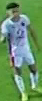

557.7723388671875


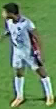

614.0407104492188


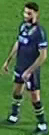

282.236083984375


339.58135986328125


354.74139404296875


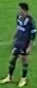

229.67440795898438


245.67063903808594


321.5970153808594


321.5468444824219


258.578125


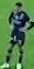

In [ ]:
i = 0
for player in tracks['players'][0].items():
    bbox = player
    frame = video_frames[0]
    print(bbox[1]['bbox'][1])
    #print(bbox,frame)
    cropped_image = frame[int(bbox[1]['bbox'][1]):int(bbox[1]['bbox'][3]),int(bbox[1]['bbox'][0]):int(bbox[1]['bbox'][2])]
    cv2_imshow(cropped_image)
    i+=1
    if i>10:
        break


In [ ]:
from sklearn.cluster import KMeans

class TeamAssigner:
    def __init__(self):
        self.team_colors = {}
        self.player_team_dict = {}

    def get_clustering_model(self,image):
        # Reshape the image to 2D array
        image_2d = image.reshape(-1,3)

        # Preform K-means with 2 clusters
        kmeans = KMeans(n_clusters=2, init="k-means++",n_init=1)
        kmeans.fit(image_2d)

        return kmeans

    def get_player_color(self,frame,bbox):
        image = frame[int(bbox[1]):int(bbox[3]),int(bbox[0]):int(bbox[2])]

        top_half_image = image[0:int(image.shape[0]/2),:]

        # Get Clustering model
        kmeans = self.get_clustering_model(top_half_image)

        # Get the cluster labels forr each pixel
        labels = kmeans.labels_

        # Reshape the labels to the image shape
        clustered_image = labels.reshape(top_half_image.shape[0],top_half_image.shape[1])

        # Get the player cluster
        corner_clusters = [clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]
        non_player_cluster = max(set(corner_clusters),key=corner_clusters.count)
        player_cluster = 1 - non_player_cluster

        player_color = kmeans.cluster_centers_[player_cluster]

        return player_color


    def assign_team_color(self,frame, player_detections):

        player_colors = []
        for _, player_detection in player_detections.items():
            bbox = player_detection["bbox"]
            player_color =  self.get_player_color(frame,bbox)
            player_colors.append(player_color)

        kmeans = KMeans(n_clusters=2, init="k-means++",n_init=10)
        kmeans.fit(player_colors)

        self.kmeans = kmeans

        self.team_colors[1] = kmeans.cluster_centers_[0]
        self.team_colors[2] = kmeans.cluster_centers_[1]


    def get_player_team(self,frame,player_bbox,player_id):
        if player_id in self.player_team_dict:
            return self.player_team_dict[player_id]

        player_color = self.get_player_color(frame,player_bbox)

        team_id = self.kmeans.predict(player_color.reshape(1,-1))[0]
        team_id+=1

        if player_id ==91:
            team_id=1

        self.player_team_dict[player_id] = team_id

        return team_id

In [73]:
# Speed and distance estimator
speed_and_distance_estimator = SpeedAndDistance_Estimator()
speed_and_distance_estimator.add_speed_and_distance_to_tracks(tracks)

In [ ]:
team_assigner = TeamAssigner()

In [ ]:
team_assigner.assign_team_color(video_frames[0],tracks['players'][0])

In [ ]:
for frame_num, player_track in enumerate(tracks['players']):
        for player_id, track in player_track.items():
            team = team_assigner.get_player_team(video_frames[frame_num],
                                                 track['bbox'],
                                                 player_id)
            tracks['players'][frame_num][player_id]['team'] = team
            tracks['players'][frame_num][player_id]['team_color'] = team_assigner.team_colors[team]

In [60]:
player_assigner =PlayerBallAssigner()
team_ball_control= []
for frame_num, player_track in enumerate(tracks['players']):

    ball_bbox = tracks['ball'][frame_num][1]['bbox']
    assigned_player = player_assigner.assign_ball_to_player(player_track, ball_bbox)

    if assigned_player != -1:
        tracks['players'][frame_num][assigned_player]['has_ball'] = True
        team_ball_control.append(tracks['players'][frame_num][assigned_player]['team'])
    else:
        try:
            team_ball_control.append(team_ball_control[-1])
        except:
          pass
        #team_ball_control.append(team_ball_control[-1])
team_ball_control= np.array(team_ball_control)

In [62]:
output_video_frames = tracker.draw_annotations(video_frames, tracks,team_ball_control)

In [74]:
## Draw Camera movement
output_video_frames = camera_movement_estimator.draw_camera_movement(output_video_frames,camera_movement_per_frame)

In [75]:
## Draw Speed and Distance
speed_and_distance_estimator.draw_speed_and_distance(output_video_frames,tracks)

[array([[[167, 163, 169],
         [165, 161, 167],
         [163, 159, 166],
         ...,
         [ 31,  23,  59],
         [ 34,  27,  69],
         [ 37,  30,  72]],
 
        [[166, 162, 168],
         [165, 161, 167],
         [165, 160, 167],
         ...,
         [ 45,  37,  73],
         [ 41,  34,  76],
         [ 41,  34,  76]],
 
        [[168, 164, 169],
         [167, 163, 169],
         [165, 161, 167],
         ...,
         [ 75,  70,  92],
         [ 66,  64,  92],
         [ 64,  62,  90]],
 
        ...,
 
        [[ 59, 113,  66],
         [ 61, 115,  68],
         [ 56, 117,  69],
         ...,
         [ 51,  41,  41],
         [ 52,  39,  35],
         [ 55,  42,  38]],
 
        [[ 55, 109,  62],
         [ 56, 110,  63],
         [ 52, 113,  65],
         ...,
         [ 51,  41,  41],
         [ 52,  39,  35],
         [ 55,  42,  38]],
 
        [[ 56, 110,  63],
         [ 55, 109,  62],
         [ 49, 110,  62],
         ...,
         [ 51,  41,  41],
  

In [76]:
save_video(output_video_frames, 'output_video_1.avi')